<a href="https://colab.research.google.com/github/yuriborg/time_series/blob/main/Granger_Casuality_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spurious Regression

Linear regression might indicate a strong relationship between two or more variables, but these variables may be totally unrelated in reality. Predictions fail when it comes to domain knowledge, this scenario is known as spurious regression.

For example, the below image indicates that there is a strong relationship between chicken consumption and crude oil exports in the below graph even though they are unrelated.

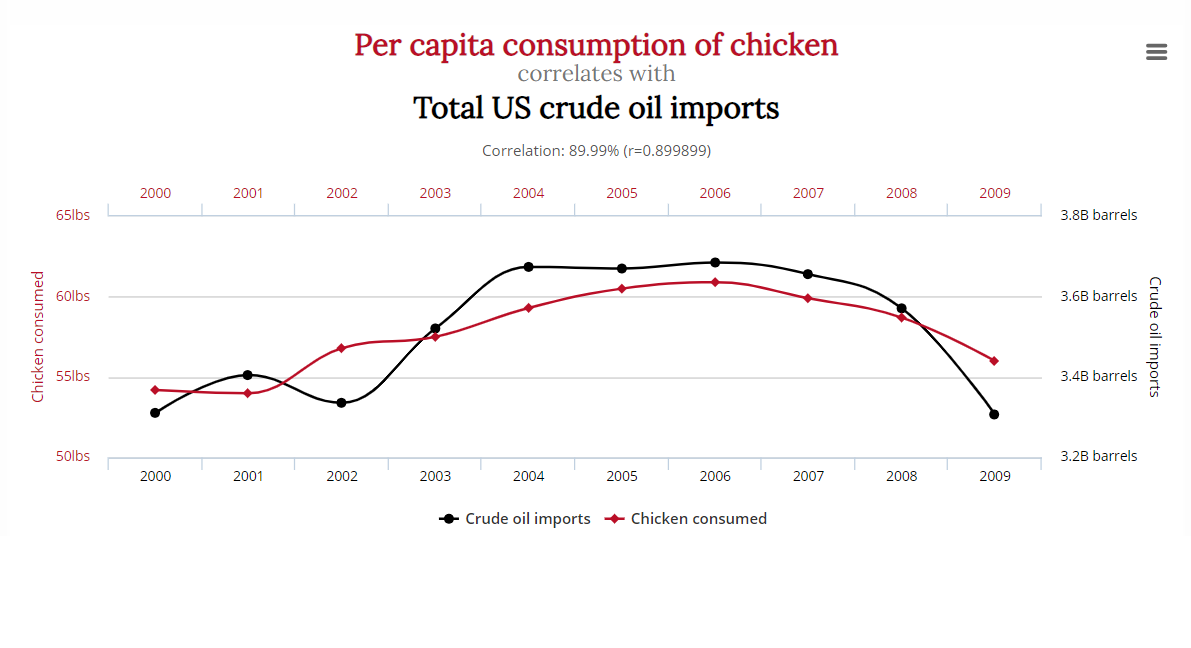



Strong trend / nonstationary and higher R square are observed in spurious regression. Spurious regression has to be eliminated while building the model since they are unrelated and have no causal relationship.

  - Granger Casuality is basically an econometric hypothetical test for verifying the usage of one variable in forecasting another in multivariate time series data with a particular lag.

  - It is a statistical concept used to determine whether one time series can predict the future values of another time series. It measures the extent to which the past values of one variable provide valuable information for forecasting the other variable’s future behavior. Granger causality helps analyze potential relationships between variables, aiding in predicting trends. However, it’s important to note that Granger causality doesn’t prove direct causation and should be interpreted cautiously when evaluating causal relationships between variables.

A prerequisite for performing the Granger Causality test is that the data need to be stationary i.e it should have a constant mean, constant variance, and no seasonal component.

  - Limitation

  
Granger causality does not provide any insight on the relationship between the variable hence it is not true causality unlike ’cause and effect’ analysis.
Granger causality fails to forecast when there is an interdependency between two or more variables (as stated in Case 3).
Granger causality test can’t be performed on non-stationary data.

# Practical Example:

  - Chicken and Egg

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
#define URL where dataset is located
url = "https://raw.githubusercontent.com/Statology/Miscellaneous/main/chicken_egg.txt"

#read in dataset as pandas DataFrame
df = pd.read_csv(url, sep="  ")

#view first five rows of DataFrame
df.head()

<ipython-input-4-27febba5cb3c>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(url, sep="  ")


,year,chicken,egg
0,1930,468491,3581
1,1931,449743,3532
2,1932,436815,3327
3,1933,444523,3255
4,1934,433937,3156


In [ ]:
#perform Granger-Causality test
grangercausalitytests(df[['chicken', 'egg']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4050  , p=0.0030  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=18.7946 , p=0.0003  , df=3
likelihood ratio test: chi2=16.0003 , p=0.0011  , df=3
parameter F test:         F=5.4050  , p=0.0030  , df_denom=44, df_num=3


{3: ({'ssr_ftest': (5.404984372335083, 0.0029663974455762373, 44.0, 3),
   'ssr_chi2test': (18.794604749256084, 0.0003014773550056825, 3),
   'lrtest': (16.000284988230078, 0.0011338317398183065, 3),
   'params_ftest': (5.404984372328292, 0.002966397445597151, 44.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

The F test statistic turns out to be 5.405 and the corresponding p-value is 0.0030.

Since the p-value is less than .05, we can reject the null hypothesis of the test and conclude that knowing the number of eggs is useful for predicting the future number of chickens.

Although we rejected the null hypothesis of the test, it’s actually possible that there is a case of reverse causation happening. That is, it’s possible that the number of chickens is causing the number of eggs to change.



In [ ]:
#perform Granger-Causality test
grangercausalitytests(df[['egg', 'chicken']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5916  , p=0.6238  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=2.0572  , p=0.5606  , df=3
likelihood ratio test: chi2=2.0168  , p=0.5689  , df=3
parameter F test:         F=0.5916  , p=0.6238  , df_denom=44, df_num=3


{3: ({'ssr_ftest': (0.591615329454733, 0.6237862003923791, 44.0, 3),
   'ssr_chi2test': (2.0572078501494127, 0.5606182956436663, 3),
   'lrtest': (2.0167996971329103, 0.568927196697715, 3),
   'params_ftest': (0.591615329454692, 0.6237862003924051, 44.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

The F test statistic turns out to be 0.5916 and the corresponding p-value is 0.6238.

Since the p-value isn’t less than .05, we can’t reject the null hypothesis. That is, the number of chickens isn’t predictive of the future number of eggs.

Thus, we can conclude that knowing the number of eggs is useful for predicting the future number of chickens.